In [2]:
from importlib import reload
from libs import io , cv2 , np

import preprocessing as pp
import roi as roi
import detection as detect
from classifier import H3T_Classifier
import videoread as vr


In [3]:

reload(roi)
reload(detect)



<module 'detection' from 'd:\\Ahmed Ameen\\Image processing\\Project\\Code\\Hdy_3sahn_T3dy\\full_pipeline\\detection.py'>

In [4]:
# INIT

sign_imgs_corr = detect.get_corrleation_matrices("../dataset/corr_signs")


In [5]:

classifier = H3T_Classifier()


In [6]:
classifier.prepare_training_data("../dataset/road_sign_dataset/training_set")
classifier.train("svm")


7891 7891


In [7]:

classifier.save_trained_model()

In [8]:

classifier.load_trained_model()


In [9]:
# Load the image
image = io.imread("../dataset/road_sign_dataset/training_set/speed_50/50 (120).png")


In [10]:
video_path = '../dataset/videos/IMG_5066.MOV'
video_frames_folder = '../dataset/video_frames/'
vr.clear_folder(video_frames_folder)
video_frames = vr.extract_frames(video_path, video_frames_folder, fps=15)

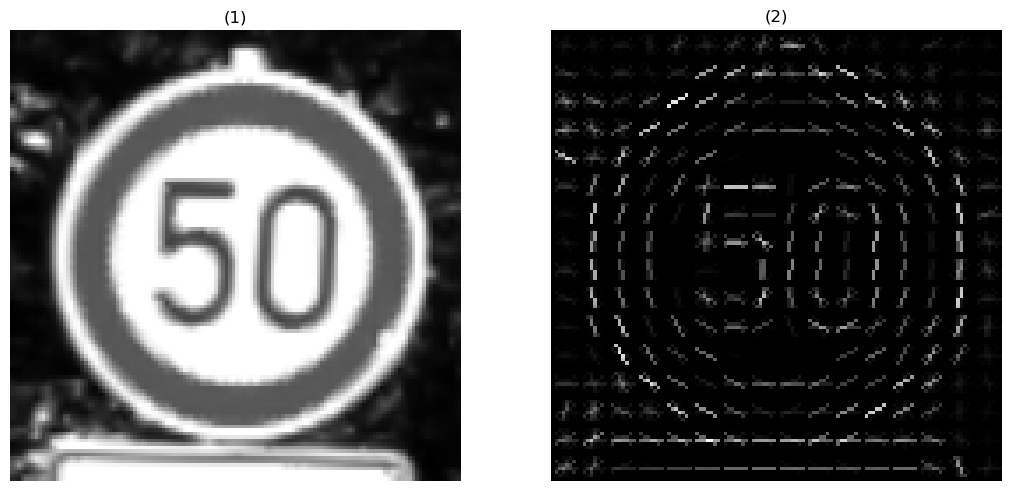

In [11]:
from skimage.feature import hog
resized_img = cv2.resize(image, (128, 128))
gray_image = pp.gray_image(resized_img)   
feature_vector , transformed_hog = hog(gray_image , visualize = True  , pixels_per_cell=(8 , 8) , cells_per_block=(4 , 4) , transform_sqrt=True)
pp.show_images([gray_image, transformed_hog])

In [12]:
# image = io.imread("../dataset/screenshots/3.jpg")
image = video_frames[-3]

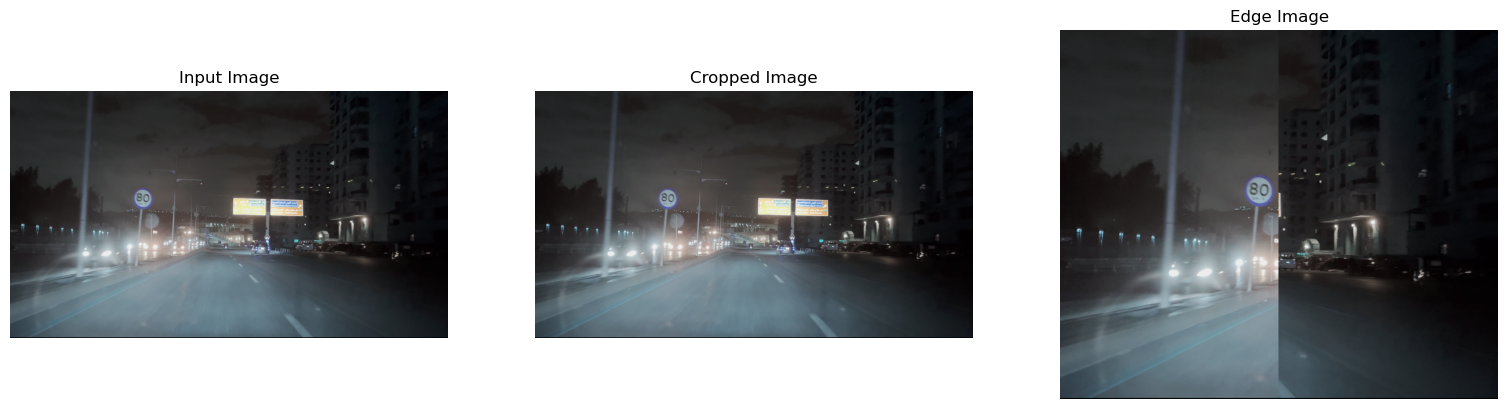

In [13]:

resized_img = cv2.resize(image, (1280, 720))

#pp.show_images([image], ["Input Image"])

cropped_img = cv2.hconcat([resized_img[:, :(resized_img.shape[1] // 3)]  , resized_img[:, 2 * (resized_img.shape[1] // 3):]])

# Convert the image to grayscale
gray_image = pp.gray_image(resized_img)

equalized_image = pp.HistogramEqualization(gray_image)

# Apply edge detection
edge_image = pp.LoGEdgeDetection(equalized_image)

# show pp images
pp.show_images([resized_img, image, cropped_img], ["Input Image", "Cropped Image", "Edge Image"])


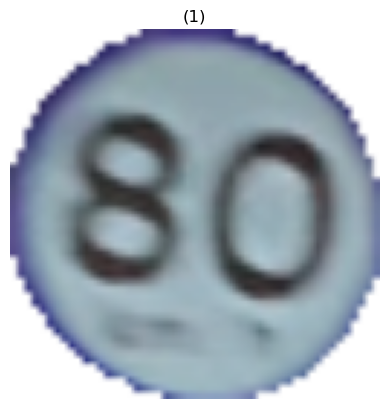

In [14]:

# Extract ROIs
rois = roi.extract_roi(edge_image , resized_img)

# print(rois[0].shape)
#show rois

# new_images = []
# for i in range(len(rois)):
#     #  rois[i] = pp.gray_image(rois[i])
#      new_images.append(pp.HistogramEqualization(rois[i]))

pp.show_images(rois)

0.37127927825579077
0.37898214832202054
0.3246949608694671
0.39044719905685515
0.3256727914926798
0.3433638233788071
[3]
0


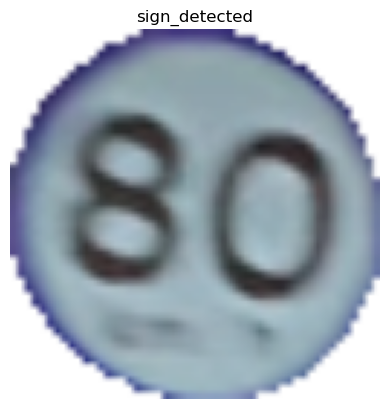

prediction is ['50']


In [15]:
if (len(rois)  == 0):
    print("no rois")
else:
    detected_image_index = detect.detect_sign(rois, sign_imgs_corr)
    print(detected_image_index) 
    if detected_image_index != -1:
        
        # feature_vector , transformed_hog = hog(rois[detected_image_index] , visualize = True , channel_axis=2  , pixels_per_cell=(16, 16) , transform_sqrt=True)
        # pp.show_images([rois[detected_image_index], transformed_hog])
        
        # gray_roi = pp.gray_image(rois[detected_image_index])
        
        # gray_roi = pp.HistogramEqualization(gray_roi)
        pp.show_images([rois[detected_image_index]], ["sign_detected"])
        
        # print(gray_roi.shape)
        print(f'prediction is {classifier.predict(rois[detected_image_index])}')
    else:
        print("no sign detected")
